In [5]:
! pip install git+https://github.com/gusanthon/pywdf

  Cloning https://github.com/gusanthon/pywdf to c:\users\pau\appdata\local\temp\pip-req-build-5uphk44w
  Resolved https://github.com/gusanthon/pywdf to commit 669299e701558254a256504bbb0533eca59b58e3
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/gusanthon/pywdf 'C:\Users\Pau\AppData\Local\Temp\pip-req-build-5uphk44w'

[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import IPython
import pywdf
from pywdf.examples.rclowpass import RCLowPass
from pywdf.examples.lc_oscillator import LCOscillator
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

## LC OSCILLATOR TESTING

import IPython
import pywdf
from pywdf.examples.rclowpass import RCLowPass
from pywdf.examples.lc_oscillator import LCOscillator
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

- Define the circuit parameters and instantiate it 

In [8]:
sr = int(48e3)
switch_closed = True
decibels = 0
lfo_frequency = .5
lfo = LCOscillator(sr)
lfo.set_params(lfo_frequency, switch_closed, decibels)

- process some samples

In [9]:
n_samples = int(4 * sr)
lfo_out = lfo(np.ones(n_samples) * 0.5) - 0.5

- plot the resulting signal

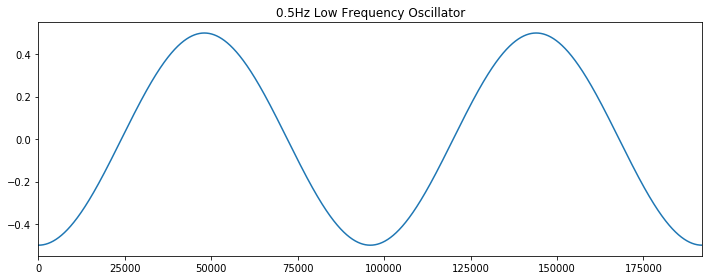

In [10]:
plt.figure(figsize=(10, 4))
plt.plot(lfo_out)
plt.xlim([0, n_samples])
plt.title(f"{lfo_frequency}Hz Low Frequency Oscillator")
plt.tight_layout()
plt.show()

- compare the obtained waveform with respect to the same sine signal from numpy

In [12]:
# compare with np.sin
t = np.linspace(0, 4, int(4*sr))
sine_out = -0.5 * np.cos(2 * np.pi * lfo_frequency * t)

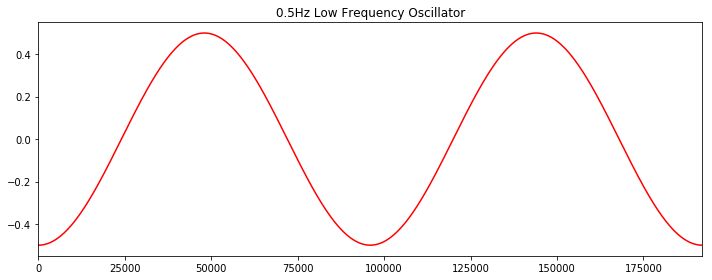

In [13]:
plt.figure(figsize=(10, 4))
plt.plot(sine_out, 'r')
plt.xlim([0, n_samples])
plt.title(f"{lfo_frequency}Hz Low Frequency Oscillator")
plt.tight_layout()
plt.show()

In [14]:
from sklearn.metrics import mean_squared_error

print('the MSE between both signals is of ', mean_squared_error(sine_out, lfo_out))

the MSE between both signals is of  4.293261684788618e-11
